In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [8]:
# means that if run your code multiple times with same random seed,should get same random outcomes, useful for comparing results.
RANDOM_SEED = 2021

#TEST_PCT typically represents the proportion of the dataset that will be used for testing, 
TEST_PCT = 0.3
LABELS = ['NORMAL', 'FRAUD']

In [9]:
df = pd.read_csv('creditcard.csv')

In [10]:
df.shape

(284807, 31)

In [90]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [14]:
#check for null vlaues

print("any nulls in the datasets:-" , df.isnull().values.any())

any nulls in the datasets:- False


In [17]:
print("No of unique labels", len(df['Class'].unique()))

No of unique labels 2


In [18]:
#0 is normal credit card transaction
#1 is fraudlant credit card transaction
print("label values", df.Class.unique())


label values [0 1]


In [19]:
print("Break down the normal and fraud transactions")

print(pd.value_counts(df['Class'], sort=True))

Break down the normal and fraud transactions
Class
0    284315
1       492
Name: count, dtype: int64


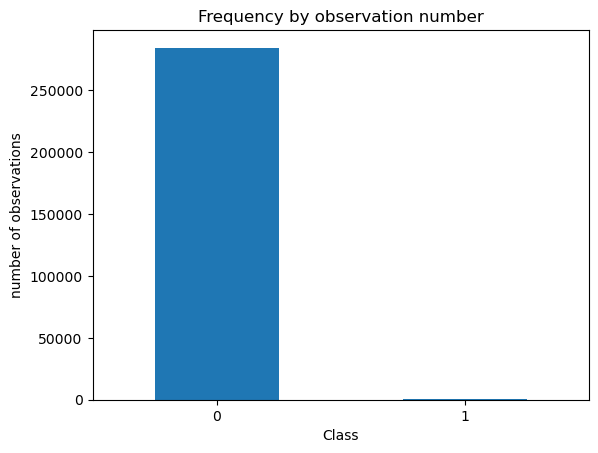

In [25]:
#visualizing the datasets and imbalanced datset

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind='bar', rot=0)

plt.xticks(range(len(df['Class'].unique())),
          df.Class.unique())

plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("number of observations");

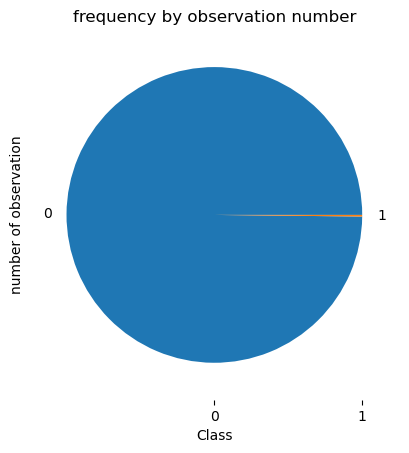

In [29]:
count_clas = pd.value_counts(df['Class'], sort = True)
count_clas.plot(kind='pie', rot=0)
plt.xticks(range(len(df['Class'].unique())),
          df.Class.unique())
plt.title("frequency by observation number")
plt.xlabel("Class")
plt.ylabel("number of observation");

In [91]:
#visualizing the amount of normal and fraud transactions

#save the normal and fraud transactions in seperate df

normal_df = df[df.Class == 0]
fraud_df = df[df.Class==1]

In [93]:
fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-1.988034,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,-1.986644,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,-1.902623,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,-1.849472,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,-1.838248,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.565196,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.569513,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,1.569597,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,1.582548,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [92]:
normal_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


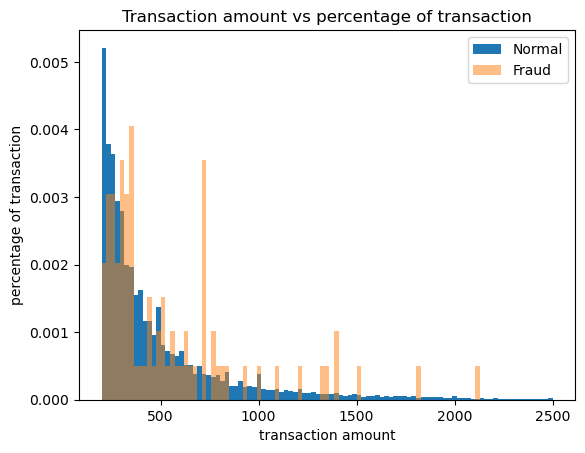

In [28]:
#visualize the transaction amounts for normal and fraud transactions

#num evenly spaced values over the closed interval 

bins = np.linspace(200,2500,100)
#alpha=0.5 sets the transparency of the bars to 0.5, making them semi-transparent.
plt.hist(normal_df.Amount, bins=bins, alpha=1,
        density=True, label='Normal')

plt.hist(fraud_df.Amount, bins=bins, alpha = 0.5,
        density=True, label = 'Fraud')

plt.legend(loc='upper right')
plt.title("Transaction amount vs percentage of transaction")
plt.xlabel("transaction amount")
plt.ylabel("percentage of transaction")
plt.show()

In [30]:
#Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns

In [32]:
sc = StandardScaler()
df['Time'] = sc.fit_transform(df['Time'].values.reshape(-1,1))

df['Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))

In [33]:
raw_data = df.values

#the last element contain if the transaction is normal which is represented by 0 and if fraud then 1

labels = raw_data[:,-1]

data = raw_data[:,0:-1]

train_data,test_data,train_labels,test_labels = train_test_split(
data,labels,test_size=0.2,random_state=2021)

In [37]:
#normalize the data to have a between 0 and 1

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

In [38]:
train_data = (train_data - min_val) / (max_val - min_val)

In [39]:
test_data = (test_data - min_val) / (max_val - min_val)

In [40]:
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [42]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#creating normal and fraud datasets
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]

fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]

print("No of records in fraud train data", len(fraud_train_data))
print("No of records in normal train data", len(normal_train_data))

print("no of records in fraud test data=" ,len(fraud_train_data))
print("no of records in normal test data=", len(normal_test_data))


No of records in fraud train data 389
No of records in normal train data 227456
no of records in fraud test data= 389
no of records in normal test data= 56859


In [57]:
#set training parameter values

nb_epoch = 50
batch_size = 65
input_dim = normal_train_data.shape[1]
encoding_dim = 14
hidden_dim_1 = int(encoding_dim/2)
hidden_dim_2 = 4
learning_rate = 1e-7

In [ ]:
#create autoencdoer


In [45]:
#input layer
input_layer = tf.keras.layers.Input(shape=(input_dim,))

In [58]:
#encoder

#defines the first dense layer of the encoder.
encoder = tf.keras.layers.Dense(encoding_dim,activation='tanh',
activity_regularizer = tf.keras.regularizers.l2(learning_rate))(input_layer)

#a 20% dropout rate is added after the first encoder layer.
encoder = tf.keras.layers.Dropout(0.2)(encoder)

# defines the second dense layer of the encoder wit
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)

#he third dense layer uses the Leaky ReLU activation function.
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

In [64]:
#decoder

#first dense layer of the decoder 
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)

#A dropout layer is added after this decoder layer.
decoder = tf.keras.layers.Dropout(0.2)(decoder)

#The second dense layer has encoding_dim units.
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)

#The final dense layer in the decoder maps back to the original input dimension (input_dim) with a tanh activation.
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

In [65]:
#autoencoder

# The autoencoder is the combination of the encoder and decoder.
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)


In [66]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_10 (Dense)            (None, 14)                434       
                                                                 
 dropout_5 (Dropout)         (None, 14)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                 105       
                                                                 
 dense_12 (Dense)            (None, 4)                 32        
                                                                 
 dense_21 (Dense)            (None, 7)                 35        
                                                                 
 dropout_10 (Dropout)        (None, 7)                 0     

In [ ]:
#defines the callabcks for checkpoints for early stopping
#This callback is used to save the model's weights during training


In [68]:

#A value of 2 means that it will print information when a new best model is saved.
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.hs", mode="min",
monitor = 'val_loss' , verbose = 2,save_best_only = True)

In [71]:
#define early stopping

#1 means it will print messages when training stops early.
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    # training will stop when the monitored quantity (validation loss) stops decreasing, 
    mode='min',
    restore_best_weights=True)

In [72]:
#compile the autoencoder

autoencoder.compile(metrics=['accuracy'],
                   loss = 'mean_squared_error',
                   optimizer='adam')

In [73]:
#train the autonecoder



In [75]:
history = autoencoder.fit(normal_test_data,normal_test_data,
                         epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          
                          validation_data=(test_data, test_data),
                          verbose=1,
                          callbacks=[cp,early_stop]
                         ).history

Epoch 1/50
871/875 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.0416
Epoch 1: val_loss improved from inf to 0.00002, saving model to autoencoder_fraud.hs
INFO:tensorflow:Assets written to: autoencoder_fraud.hs\assets


INFO:tensorflow:Assets written to: autoencoder_fraud.hs\assets


875/875 [==============================] - 8s 7ms/step - loss: 0.0167 - accuracy: 0.0418 - val_loss: 2.4568e-05 - val_accuracy: 0.0263
Epoch 2/50
855/875 [============================>.] - ETA: 0s - loss: 2.2743e-05 - accuracy: 0.0578
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.hs
INFO:tensorflow:Assets written to: autoencoder_fraud.hs\assets


INFO:tensorflow:Assets written to: autoencoder_fraud.hs\assets


875/875 [==============================] - 6s 6ms/step - loss: 2.2652e-05 - accuracy: 0.0574 - val_loss: 1.9834e-05 - val_accuracy: 0.0596
Epoch 3/50
855/875 [============================>.] - ETA: 0s - loss: 1.9275e-05 - accuracy: 0.0536
Epoch 3: val_loss did not improve from 0.00002
875/875 [==============================] - 4s 5ms/step - loss: 1.9223e-05 - accuracy: 0.0545 - val_loss: 1.9838e-05 - val_accuracy: 0.0596
Epoch 4/50
867/875 [============================>.] - ETA: 0s - loss: 1.9132e-05 - accuracy: 0.0488
Epoch 4: val_loss did not improve from 0.00002
875/875 [==============================] - 4s 4ms/step - loss: 1.9118e-05 - accuracy: 0.0487 - val_loss: 1.9849e-05 - val_accuracy: 0.0716
Epoch 5/50
870/875 [============================>.] - ETA: 0s - loss: 1.9097e-05 - accuracy: 0.0648
Epoch 5: val_loss did not improve from 0.00002
875/875 [==============================] - 4s 5ms/step - loss: 1.9087e-05 - accuracy: 0.0651 - val_loss: 1.9933e-05 - val_accuracy: 0.1279
Epo

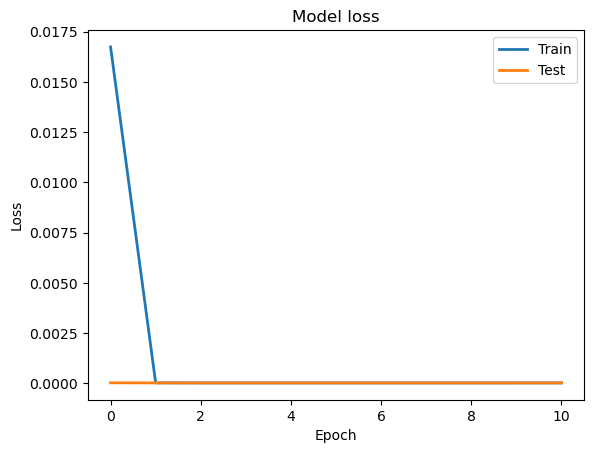

In [84]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
#detect anamolies on test data

#Anomalies are data points where the reconstruction loss is higher

#To calculate the reconstruction loss on test data, predict the test data and calculate the mean square error between the test data and the reconstructed test data.

In [85]:
test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

1781/1781 [==============================] - 3s 2ms/step


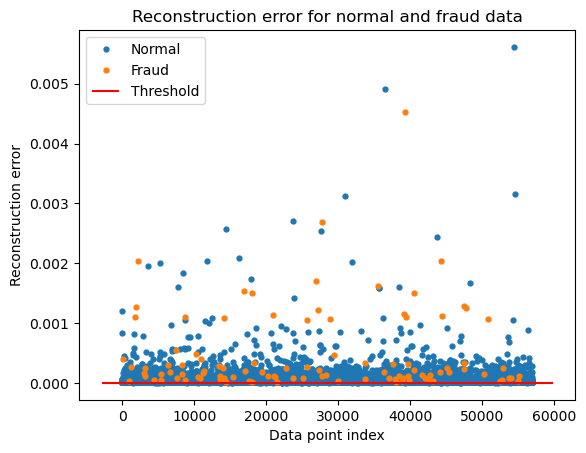

In [88]:
threshold_fixed = 0
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

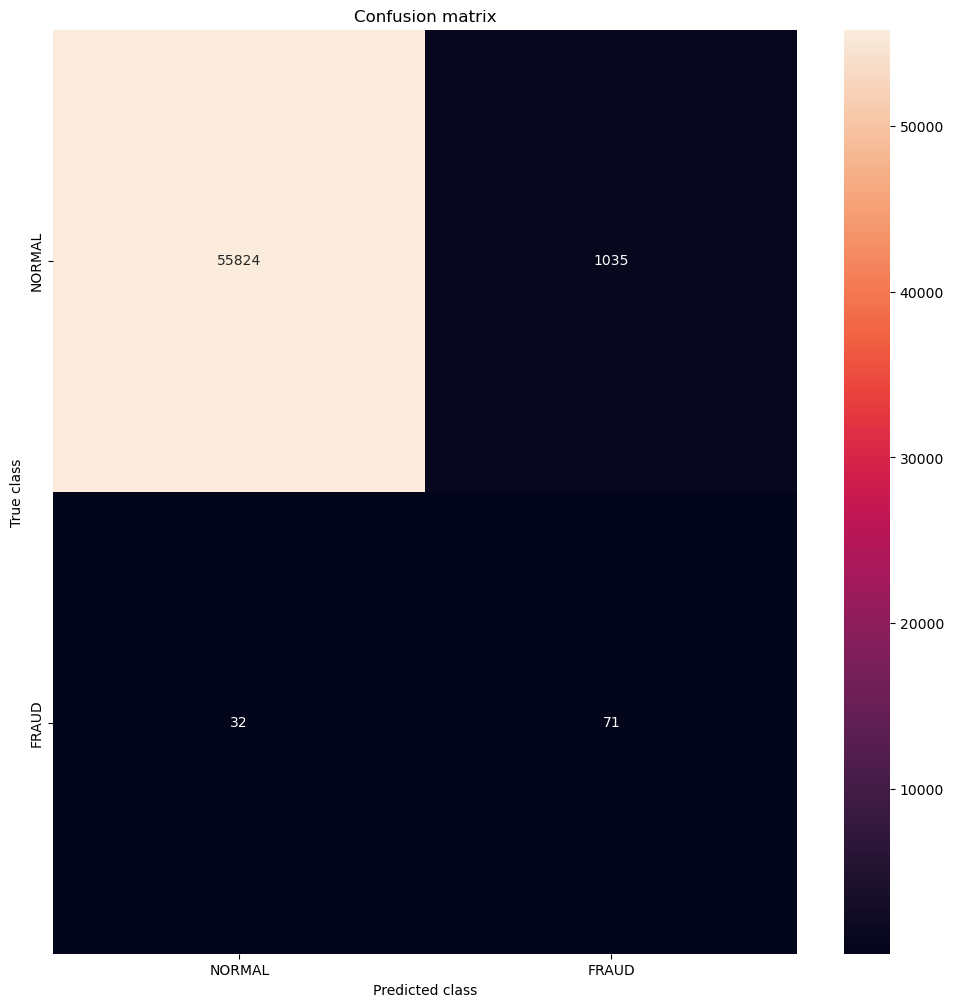

In [89]:
threshold_fixed = 0.0001
y_pred = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()